In [1]:
%tensorflow_version 2.x 
!pip install -q sklearn
import tensorflow as tf
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from sklearn.model_selection import train_test_split

df  =pd.read_csv('/content/drive/MyDrive/Colab_Data/heart_data/heart.csv')
train , test = train_test_split(df, test_size=0.2 ,random_state = 0)#random_state maintains the same series of rows/id/indexing in the dataset after split 
y_train  = train.pop('target')
y_test  = test.pop('target')
test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
807,44,1,2,130,233,0,1,179,1,0.4,2,0,2
27,58,0,1,136,319,1,0,152,0,0.0,2,2,2
77,63,1,0,140,187,0,0,144,1,4.0,2,2,3
406,58,1,2,140,211,1,0,165,0,0.0,2,0,2
886,61,1,0,120,260,0,1,140,1,3.6,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,43,0,2,122,213,0,1,165,0,0.2,1,0,2
320,53,0,0,130,264,0,0,143,0,0.4,1,0,2
362,43,0,2,122,213,0,1,165,0,0.2,1,0,2
452,66,0,0,178,228,1,1,165,1,1.0,1,2,3


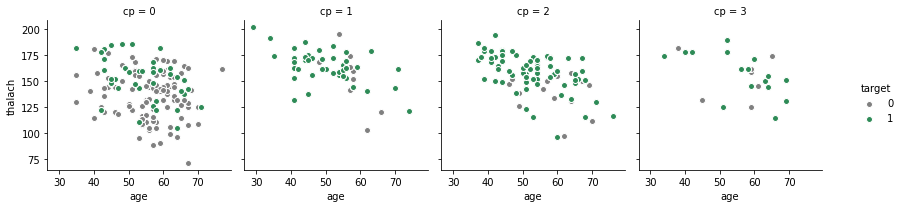

In [4]:
import seaborn as sns
g = sns.FacetGrid(df, hue="target", col="cp", margin_titles=True,
                  palette={1:"seagreen", 0:"gray"})
g=g.map(plt.scatter, "age", "thalach",edgecolor="w").add_legend();

In [5]:
NUMERIC_COLUMNS = ['age', 'sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']

feature_columns = []
for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='sex', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='cp', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='trestbps', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='chol', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='fbs', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='restecg', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='thalach', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='exang', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='oldpeak', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='s

In [6]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use

train_input_fn = make_input_fn(train, y_train)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(test, y_test, num_epochs=1, shuffle=False)

linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
# We create a linear estimtor by passing the feature columns we created earlier

linear_est.train(train_input_fn)  # train
result = linear_est.evaluate(eval_input_fn)  # get model metrics/stats by testing on tetsing data

clear_output()  # clears consoke output
print(result['accuracy'])  # the result variable is simply a dict of stats about our model

0.595122


In [7]:
result  = list(linear_est.predict(eval_input_fn))
print(test.iloc[0])
print(y_test.iloc[0])
print(result[3]['probabilities'][1])

INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpj8znev2w/model.ckpt-260
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
age          44.0
sex           1.0
cp            2.0
trestbps    130.0
chol        233.0
fbs           0.0
restecg       1.0
thalach     179.0
exang         1.0
oldpeak       0.4
slope         2.0
ca            0.0
thal          2.0
Name: 807, dtype: float64
1
0.36312106
